数据准备

In [2]:
import pandas as pd   ## 导入 pandas 库，并为其指定常用别名 pd
# pandas 是用于数据处理和分析的核心库，常用于读取/清洗/操作结构化数据（如表格数据）

数据读取

In [3]:
text_ana = pd.read_excel('text_analysis_twitter_sample.xlsx')  # 读取 Excel 文件


In [4]:
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)   # 删除不需要的列 'Unnamed: 0'，通常是索引列或多余的列

In [5]:
#text_ana  # 显示 DataFrame 的内容，通常用于检查数据是否正确加载和处理

数据预处理

In [6]:
import re  # Ensure the 're' module is imported

def preprocess_text(text):
    # 转换大小写
    text = text.lower()

    # 移除URL
    text = re.sub(r'http\S+', '', text)

    # 移除特殊字符和数字
    #text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 移除多余的空格
    #text = re.sub(r'\s+', ' ', text).strip()

    # 移除停用词
    stop_words = set([
     # 基础介词/连词
    'to', 'of', 'in', 'for', 'on', 'with', 'at', 'by', 'as', 'than', 'under', 'over','from',
    
    # 代词
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 
    'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
    
    # 限定词/连接词
    'the', 'a', 'an', 'this', 'that', 'these', 'those', 'each', 'every', 
    'and', 'or', 'but', 'if', 'though', 'because', 'since', 'until', 'while',
    
    # 动词/助动词
    'is', 'are', 'was', 'were', 'be', 'being', 'been', 'have', 'has', 'had',
    'do', 'does', 'did', 'will', 'would', 'shall', 'should', 'can', 'could', 'may', 'might', 'must',
    
    # 副词/形容词
    'very', 'too', 'so', 'just', 'only', 'also', 'even', 'enough', 'already', 'still',
    'here', 'there', 'now', 'then', 'when', 'where', 'why', 'how', 'what', 'which', 'who', 'whom',
    
    # 否定词
    'not', 'no', 'never', 'nor', 'none', 'neither',
    
    # 社交媒体特定词
    'rt', 'qt', 'amp', '&amp;', 'com', 'http', 'https', 'www',
    
    # 其他高频虚词
    'about', 'above', 'after', 'before', 'between', 'through', 'during', 'without', 'within', 'around',
    'again', 'against', 'all', 'any', 'both', 'few', 'more', 'most', 'other', 'some', 'such', 'own', 'same'
    ])
    
    # 移除停用词
    text = ' '.join([word for word in text.split() if word not in stop_words])
    
    return text

In [20]:
#text_ana['text'].apply(preprocess_text)  # 对 'text' 列应用预处理函数，清洗文本数据

构建词袋模型

In [8]:
 # 导入 CountVectorizer 类，用于将文本数据转换为词袋模型特征矩阵
from sklearn.feature_extraction.text import CountVectorizer  

#初始化
vectorizer = CountVectorizer()

# 将文本数据转化为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))

#展示特征矩阵的形状
print('词袋特征矩阵的形状：', X.shape)

#展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

词袋特征矩阵的形状： (500, 3508)
特征词列表: ['00' '000' '00am' ... 'zinke' 'zone' 'пенсионер']


In [9]:
len(vectorizer.get_feature_names_out())  # 输出特征词的数量


3508

In [10]:
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6875 stored elements and shape (500, 3508)>

In [11]:
feature_words = vectorizer.get_feature_names_out()   # 获取特征词列表

In [12]:
feature_words.shape  # 输出特征词的形状

(3508,)

In [13]:
X.sum(axis=0).shape   # 输出每个特征词的总出现次数的形状

(1, 3508)

In [14]:
X.sum(axis=0)[0]  # 输出第一个特征词的总出现次数

matrix([[2, 4, 1, ..., 2, 1, 1]], shape=(1, 3508))

In [15]:
#计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [16]:
word_freq # 将词频统计转换为 DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['word', 'frequency'])
# 按照频率降序排序
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

In [17]:
word_freq.items()    # 输出词频统计 DataFrame 的前几行
word_freq_df.head(10)  # 显示词频统计的前10个词

,word,frequency
3238,trump,41
3098,tax,40
3184,today,38
2137,new,28
3141,thank,27
417,bill,27
3304,us,26
1697,it,26
2127,need,25
1342,get,25


词频统计

In [18]:
#观察词袋模型的词频统计结果   
sorted(word_freq.items(), key=lambda  x: x[1], reverse=True)
#显示前10个词频最高的词
top_10_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]


词云图

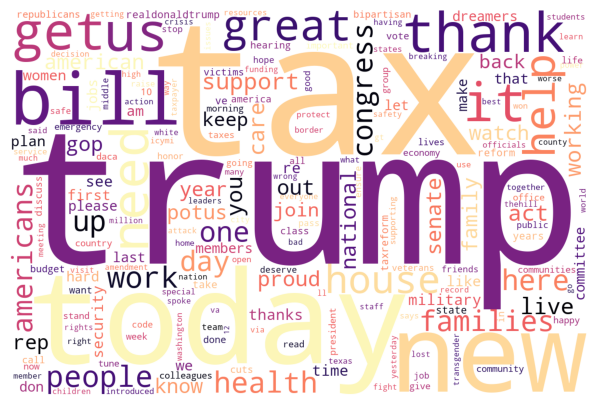

In [19]:
from wordcloud import WordCloud  ### 导入 WordCloud 类，用于生成词云图
import matplotlib.pyplot as plt   ## 导入 matplotlib 库，用于绘图和显示词云图
#根据词袋模型分析结果绘制词云图
wc = WordCloud(
width=1200, height=800,
max_words=200,
colormap='magma',
background_color='white',
#font_path='STHeiti Medium.ttc'  # 使用黑体字体
).generate_from_frequencies(word_freq)
#显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')
# plt.savefig('wordcloud_twi.png', dpi=100)
plt.show()